In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [19]:
# Load data from CSV
df = pd.read_csv('Stock Market Dataset.csv', parse_dates=['Date'])

C:\Users\Suyash\AppData\Local\Temp\ipykernel_22808\1257698283.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('Stock Market Dataset.csv', parse_dates=['Date'])


In [10]:
df.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,2024-01-02,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [20]:
df = df.drop(df.columns[0], axis=1)

In [21]:
df

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,2024-01-02,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2019-08-02,2.583,147880.0,52.72,621000.0,2.8140,270.0,"3,661.70",699230.0,802.2,...,"3,00,771",240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,"1,318.50",150610.0
1239,2019-07-02,2.551,211790.0,52.64,749010.0,2.8320,320.0,"3,397.70",471360.0,800.8,...,"3,02,813",240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,"1,314.20",166760.0
1240,2019-06-02,2.662,98330.0,54.01,606720.0,2.8400,100.0,"3,404.30",514210.0,807.1,...,"3,08,810",120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,"1,314.40",137250.0
1241,2019-05-02,2.662,82250.0,53.66,609760.0,2.8205,90.0,"3,468.40",460950.0,821.35,...,"3,10,700",360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,"1,319.20",129010.0


In [22]:
# Data Preprocessing
# Remove commas and convert to float
features = ['Natural_Gas_Price', 'Natural_Gas_Vol.', 'Copper_Price', 'Copper_Vol.', 
            'Bitcoin_Price', 'Bitcoin_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 
            'Netflix_Price', 'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 
            'Meta_Price', 'Meta_Vol.', 'Gold_Price', 'Gold_Vol.']

for column in features:
    if df[column].dtype == 'object':
        df[column] = df[column].str.replace(',', '').astype(float)

# Handle missing values by filling with mean of the column
df.fillna(df.mean(), inplace=True)

# Feature Selection: Using 'Crude_oil_Price' as the target variable for modeling
target = 'Crude_oil_Price'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Suyash\AppData\Local\Temp\ipykernel_22808\496857155.py:13: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
C:\Users\Suyash\AppData\Local\Temp\ipykernel_22808\496857155.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [23]:
# Model Building: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model Building: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
# Make predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate model performance
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Linear Regression MSE: {lr_mse}, R2: {lr_r2}')
print(f'Random Forest MSE: {rf_mse}, R2: {rf_r2}')

Linear Regression MSE: 55.77312494284521, R2: 0.8808219830672602
Random Forest MSE: 19.688910947510035, R2: 0.9579280277966463


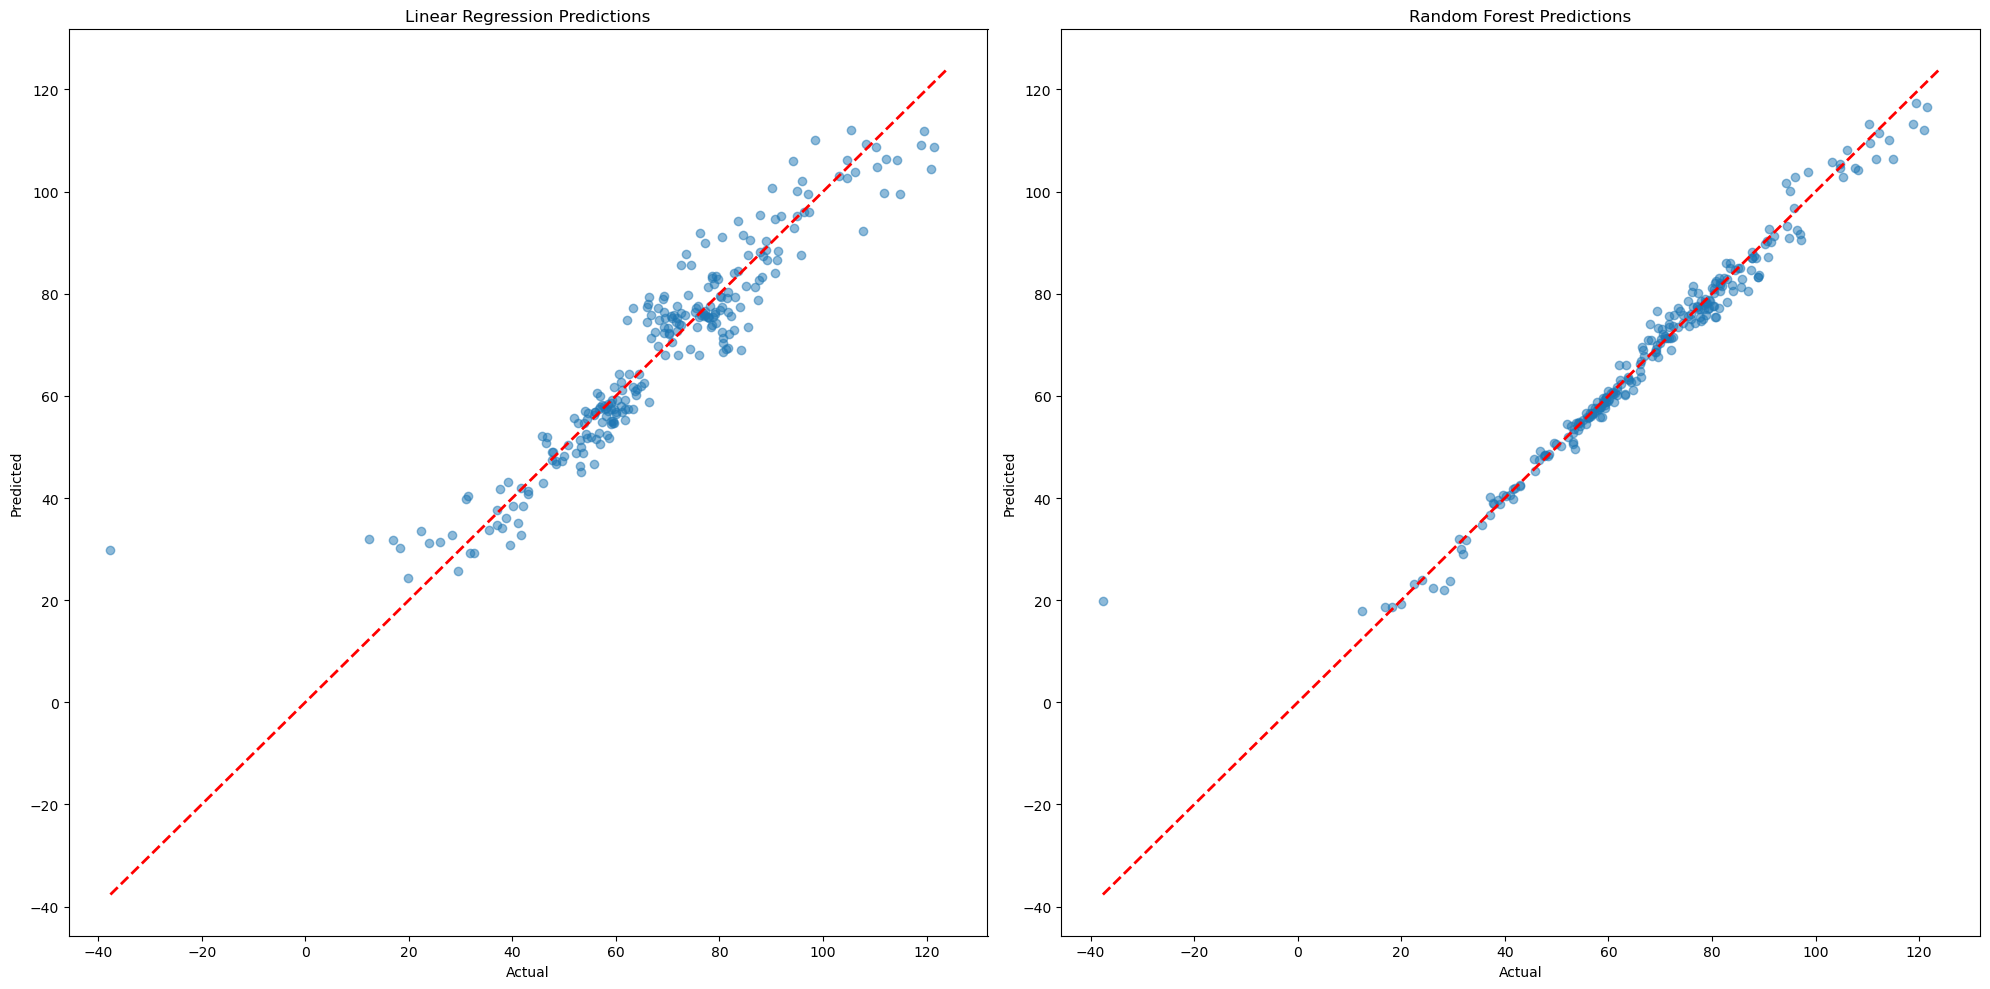

In [29]:
# Plotting the results
plt.figure(figsize=(20, 10))

# Linear Regression Predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Predictions')

# Random Forest Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Predictions')

plt.tight_layout()
plt.show()

# END BELOW IS JUST FOR ENTERTAINMENT PURPOSES.

Epoch 1/50
25/25 [==============================] - 8s 80ms/step - loss: 0.0695 - val_loss: 0.0179
Epoch 2/50
25/25 [==============================] - 1s 24ms/step - loss: 0.0174 - val_loss: 0.0070
Epoch 3/50
25/25 [==============================] - 1s 29ms/step - loss: 0.0217 - val_loss: 0.0049
Epoch 4/50
25/25 [==============================] - 1s 24ms/step - loss: 0.0133 - val_loss: 0.0068
Epoch 5/50
25/25 [==============================] - 1s 23ms/step - loss: 0.0264 - val_loss: 0.0162
Epoch 6/50
25/25 [==============================] - 1s 29ms/step - loss: 0.0682 - val_loss: 0.1056
Epoch 7/50
25/25 [==============================] - 1s 28ms/step - loss: 0.0256 - val_loss: 0.0368
Epoch 8/50
25/25 [==============================] - 1s 28ms/step - loss: 0.0287 - val_loss: 0.0710
Epoch 9/50
25/25 [==============================] - 1s 23ms/step - loss: 0.0374 - val_loss: 0.0227
Epoch 10/50
25/25 [==============================] - 1s 22ms/step - loss: 0.0086 - val_loss: 0.0167
Epoch 11/

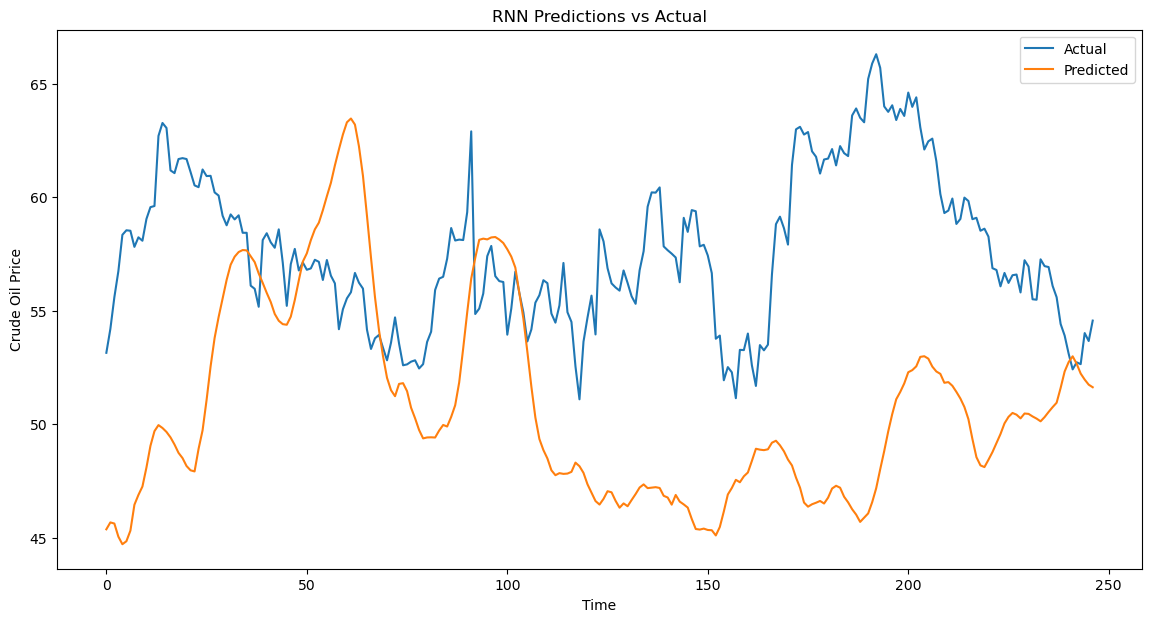

In [36]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# Normalize the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]])

# Convert to sequences for RNN
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10

X_sequences, y_sequences = create_sequences(X_scaled, y_scaled, TIME_STEPS)

# Split into training and testing sets
split = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:split], X_sequences[split:]
y_train, y_test = y_sequences[:split], y_sequences[split:]

# Build the RNN model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, shuffle=False)

# Make predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Evaluate model performance
mse = mean_squared_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f'RNN MSE: {mse}, R2: {r2}')

# Plotting the results
plt.figure(figsize=(14, 7))

plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Crude Oil Price')
plt.title('RNN Predictions vs Actual')
plt.legend()
plt.show()